# Intuitive and Visual Explanation on the differences between L1 and L2 regularization

The L1 and L2 regularization are widely used methods to control the model complexity and restrict over-fitting.
There are some interesting comparisons between the L1 and L2 regularization. 

## Why we need regularization?

Suppose there is an unclear relationship between y and factors $a_1, a_2, ..., a_n$. Consider using linear regression as an example. 
Given a linear model to predict y
$$
y \approx \hat{y} = a_0 + a_1 x_1 + \cdots + a_n x_n
$$

where $a_i$ are the estimated real coefficients.

Note that
1. The observed Y has some random noise in it.
2. For observed Ys, the more variables we use, the more complex model we will build, and the better estimation we will have
smaller MSE) to approximate observed Ys, including **approximating Ys random noise part**.

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2
$$

Note that we need to restrict the model complexity, to **suppress the model's intention to approximate the random noise part**. One way is to put more control
on the value of the single coefficients. If the coefficient is restricted to a small number, its corresponding factor may have limited impact on the outcome (y),
forcing the model to use othe factors to explain the variance of y's.

We choose to avoid manipulating single coefficients, but to give a quota for all these coefficients, and give them more freedom and flexibility to pick up the most
influential factors, and to eliminate the least ones.

That is the intuition of regularization.

## L1 vs. L2

To practice the regularization, or to say, to define the quota to regulate the coefficients, we have L1, Lasso 
$$
\hat{a}^{\text{lasso}} = arg\min_{a} \Bigg( \sum_{i}^n (y_i - \hat{y_i})^2 + \alpha\sum_{j}^m |a_i| \Bigg)
$$

Where $\alpha$ is the strength of the regularization. A higher $\alpha$ has stronger restrictions on the coefficients.

and L2, Ridge method
$$
\hat{a}^{\text{ridge}} = arg\min_{a} \Bigg( \sum_{i}^n (y_i - \hat{y_i})^2 + \alpha\sum_{j}^m (a_i)^2 \Bigg)
$$


## Difference between L1 and L2

The difference in the definition of L1 and L2 is: L1 controls the first order summation, while L2 has restriction on the summation of the second order of coefficients.

## Example

First we generate data, which should have a relationship that models $y = \sin(x)$, but with some random noise term. Let's see how to use linear regression
to approximate the true relation, with the help of L1 and L2 regularization.

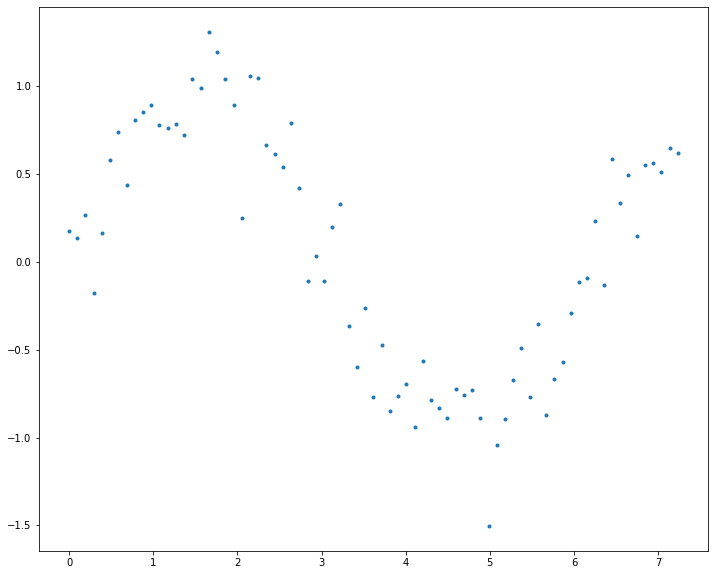

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

x = np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
np.random.seed(20)  #random 

y = np.sin(x) + np.random.normal(0,0.2,len(x)) 
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

## Regression result, with different model complexity

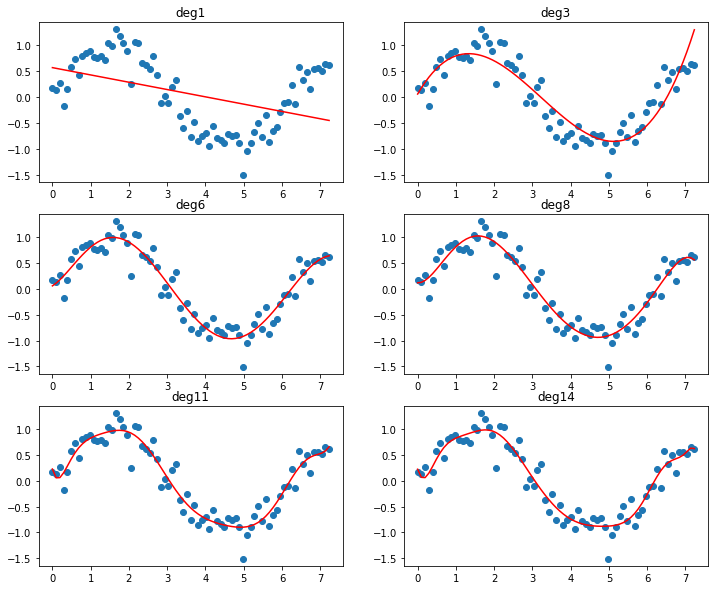

In [2]:
Y1 = np.poly1d(np.polyfit(x, y, 1))
Y2 = np.poly1d(np.polyfit(x, y, 3))
Y3 = np.poly1d(np.polyfit(x, y, 6))
Y4 = np.poly1d(np.polyfit(x, y, 8))
Y5 = np.poly1d(np.polyfit(x, y, 11))
Y6 = np.poly1d(np.polyfit(x, y, 14))

plot_coords_vals = [["1", "3"], ["6", "8"], ["11", "14"]]
plot_coords_functs = [[Y1, Y2], [Y3, Y4], [Y5, Y6]]

figure, axis = plt.subplots(3, 2)

def plot_poly(i,j):
    coord_val = plot_coords_vals[i][j]
    axis[i, j].plot(x, plot_coords_functs[i][j](x), color='r')
    axis[i, j].scatter(x, y)
    axis[i, j].set_title("deg" + coord_val)

n = len(plot_coords_vals)
m = len(plot_coords_vals[0])

for i in range(n):
    for j in range(m):
        plot_poly(i,j)
  
plt.show()

Note: There is overfitting when power order exceeds 6

## Regression with ridge regularization (L1)

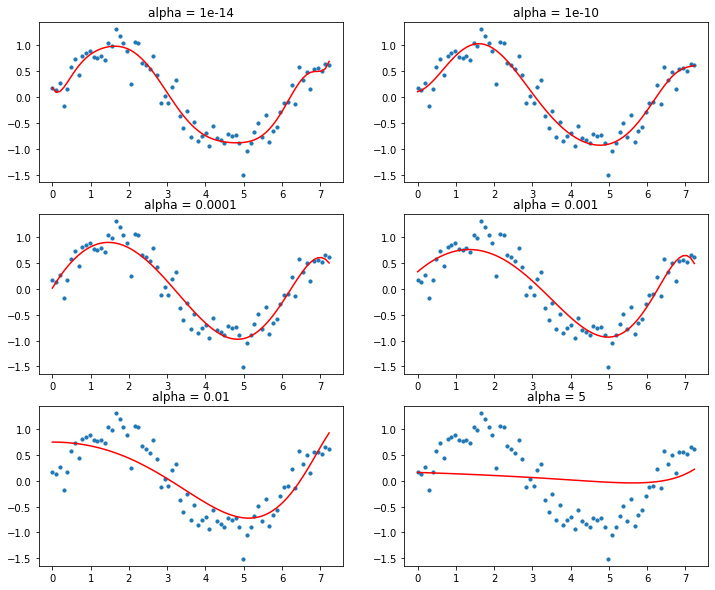

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import operator

# reshape
x_re = x[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=11)
X_poly = polynomial_features.fit_transform(x_re)

figure, axis = plt.subplots(3, 2)
# keep your alpha above the warning threshold (9.49934e-17 you will be fine
alpha_vals = [[10**(-14), 10**(-10)], [.0001, .001], [.01, 5]]
predictions =  [[None, None], [None, None], [None, None]]


n = len(alpha_vals)
m = len(alpha_vals[0])

for i in range(n):
    for j in range(m):
        
        ridge_reg = Ridge(alpha=alpha_vals[i][j], normalize=True)
        ridge_reg.fit(X_poly, y_re)

        # predict y
        pred = ridge_reg.predict(X_poly)
        predictions[i][j] = pred

# Plot fit over data
for i in range(n):
    for j in range(m):
        axis[i, j].scatter(x_re, y_re, s=10)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x_re, predictions[i][j]), key=sort_axis)
        X_re_sort, y_ridge_poly_pred = zip(*sorted_zip)
        axis[i, j].plot(X_re_sort, y_ridge_poly_pred, color='r')
        axis[i, j].set_title("alpha = " + str(alpha_vals[i][j]))
    
plt.show()

Note: With Ridge regularization, the over-fitting is eased. However, with too much restriction ($\alpha > 0.01$), 
regression can not capture the sine relation anymore.

## Regression with lasso regularization (L2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7900969642583133, tolerance: 0.0035526946344278834
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.050311582919621234, tolerance: 0.0035526946344278834
  positive)


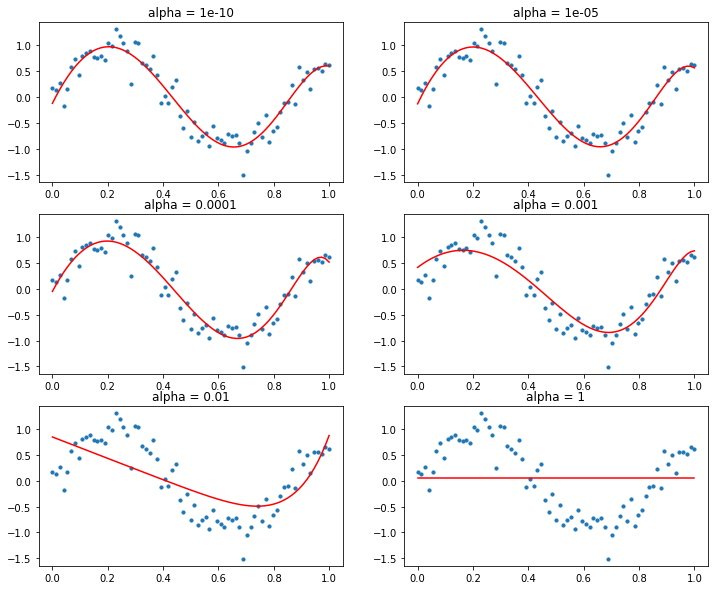

In [4]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import operator

# reshape
x_re = x[:, np.newaxis]
y_re = y[:, np.newaxis]

scaler = MinMaxScaler()
x_re = scaler.fit_transform(x_re)


# polynomial transformation
polynomial_features= PolynomialFeatures(degree=11)
X_poly = polynomial_features.fit_transform(x_re)

figure, axis = plt.subplots(3, 2)
alpha_vals = [[10**(-10), 10**(-5)], [.0001, .001], [.01, 1]]
predictions =  [[None, None], [None, None], [None, None]]

n = len(alpha_vals)
m = len(alpha_vals[0])

for i in range(n):
    for j in range(m):
        lasso_reg = Lasso(alpha=alpha_vals[i][j], max_iter=100000)
        lasso_reg.fit(X_poly, y_re)

        # predict y
        pred = lasso_reg.predict(X_poly)
        predictions[i][j] = pred

# Plot fit over data
for i in range(n):
    for j in range(m):
        axis[i, j].scatter(x_re, y_re, s=10)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x_re, predictions[i][j]), key=sort_axis)
        X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
        axis[i, j].plot(X_re_sort, y_lasso_poly_pred, color='r')
        axis[i, j].set_title("alpha = " + str(alpha_vals[i][j]))
    
plt.show()

Note: Be careful with the difference the two figures especially when alpha > =1.

## What's the difference and how to explain it?

Our goal is to find **minimal MSE**, under the restrictions of  $a_1, a_2, ..., a_m$ either
$$
\sum |a_j| < t \text{ (Lasso method)}
$$
$$
\sum a_j^2 < t \text{ (Ridge method)}
$$

For $m=2$ let $a_1=\beta_1, a_2 = \beta_2$.

With restrictions on the choices of $\beta_1, \beta_2$ we need to find the smallest MSE among them. 
**The smallest reachable MSE is the smallest ellipse (blue) tangent to the available area (red)$**

![title](img/visualization.png)

## Shrink the resticted area, and find the tangent point for MSE

If we fix the restriction or t we can try to find the corresponding $(\beta_1, \beta_2)$ for the smallest MSE.
Now we shrink t and see how the corresponding $(\beta_1, \beta_2)$ behave.

![title](img/visualization2.png)

**The difference between L1 and L2: the tangent point for L1 cases is more likely to be achieved on the axis (some parameter be reduced to zero), while the tangent point for L2 cases is more likely to be got on a none-axis point (none zero points).**